In [1]:
#!pip3 install numpy
#!pip3 install pandas
#!pip3 install scanpy

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import shortest_path as sp
import sc_pca
import random
import check_coords


In [2]:
# dir = "/Users/ozgun/Data/Josh/"
dir = "/home/ozgunbabur/Data/Josh/"
data_file = dir + "normalized_mat.tsv"
data_file_denoised = dir + "normalized_denoised_mat.tsv"
pca_pre_file = dir + "pca_coords_8.tsv"
pca_file = dir + "pca_8.tsv"
umap_coords = dir + "umap_coords.tsv"
umap_file = dir + "umap.tsv"
dist_euc_file = dir + "dist_euclidean.tsv"
dist_cos_file = dir + "dist_cosine.tsv"
dist_um_file = dir + "dist_umap.tsv"
diffexp_file = dir + "diffexp_cosine.tsv"
metadata_file = dir + "meta_data.tsv"

In [9]:

#sc_pca.sc_pca(data_file, pca_file, 10)
sp.write_distance_matrix(pca_file, dist_euc_file)
sp.write_cosine_distance_matrix(pca_file, dist_cos_file)
sp.write_distance_matrix(umap_file, dist_um_file)

In [3]:
traj, time = sp.get_traj_and_time(dir + "dist_umap.tsv", "tumor_ATCGAGTCAAGCTGGA-1", "tumor_TCAGGTATCAATAAGG-1")

print(traj)
check_coords.check_coords(traj, dir + "umap_coords.tsv")


#sp.write_changes(data_file_denoised, traj, time, diffexp_file)

['tumor_ATCGAGTCAAGCTGGA-1', 'tumor_TTCTCAACACCAGATT-1', 'tumor_CCTACACCACAGACTT-1', 'tumor_CTCGAGGCACACCGAC-1', 'tumor_TCTATTGGTAAACACA-1', 'tumor_CACAGGCTCAATCACG-1', 'tumor_CTCTGGTTCCGAAGAG-1', 'tumor_ATTGGACCAAGAAGAG-1', 'tumor_CCCAGTTTCCCATTAT-1', 'tumor_CTGGTCTAGCTGCCCA-1', 'tumor_GTGCAGCGTTGAGTTC-1', 'tumor_CTCGAGGCAGGATTGG-1', 'tumor_CGACTTCAGCTCTCGG-1', 'tumor_ATCCACCTCTGTCCGT-1', 'tumor_ACGCAGCTCAGGCAAG-1', 'tumor_AGCCTAAAGCTAGTGG-1', 'tumor_GTGCTTCTCTTGTCAT-1', 'tumor_AGATCTGCATCGATTG-1', 'tumor_TTCTCAACACACGCTG-1', 'tumor_TCAGGTATCTCGTTTA-1', 'tumor_TGGTTCCGTTCTGTTT-1', 'tumor_ACACTGAGTTCGCGAC-1', 'tumor_AGCGGTCAGTGGTAGC-1', 'tumor_GAAGCAGAGCGATAGC-1', 'tumor_TACAGTGAGGTGATTA-1', 'midpoint_AGAGCTTGTGTTGAGG-1', 'tumor_TTCTCAACAGACACTT-1', 'tumor_GCGGGTTTCGTGGGAA-1', 'tumor_CTACCCAAGGAGTTTA-1', 'tumor_TTGAACGGTAGGCTGA-1', 'tumor_ACAGCTACACTGCCAG-1', 'tumor_GGGCATCCAACTGCGC-1', 'tumor_CCCATACCAGGTGGAT-1', 'tumor_CGATCGGCAGGAACGT-1', 'tumor_ACTGATGTCACTTCAT-1', 'tumor_TTAGGCATC

,UMAP_1,UMAP_2
cell_ID,,
tumor_ATCGAGTCAAGCTGGA-1,-11.791385,1.255611
tumor_TTCTCAACACCAGATT-1,-11.830850,1.337023
tumor_CCTACACCACAGACTT-1,-11.850818,1.390959
tumor_CTCGAGGCACACCGAC-1,-11.794748,1.520846
tumor_TCTATTGGTAAACACA-1,-11.849222,1.633338
...,...,...
tumor_GACGGCTCAATGAAAC-1,-6.022050,3.978444
tumor_TCACAAGAGGGTATCG-1,-5.991089,4.012311
tumor_CGTTGGGTCCTAGAAC-1,-5.893780,4.065837


In [3]:
sp.transpose_table(pca_pre_file, pca_file)

In [8]:
sp.transpose_table(umap_coords, umap_file)

In [10]:
sp.k_rank_svd(data_file, 50, data_file_denoised)

In [18]:
centers = pd.read_table(dir + "cell_selections.txt")
centers.iloc[1][1]

'midpoint_TCTGGAAGTGTAAGTA-1'

In [11]:
centers.iloc[1]

array(['midpoint_TCTGGAAGTGTAAGTA-1',
       '[-1.77192308229959, 10.0623317198924]'], dtype=object)

In [ ]:
centers = pd.read_table(dir + "cell_selections_subset.txt")

for i in range(6):
    for j in range(6):
        if not i == j:
            source = centers.iloc[i][1]
            sInd = centers.iloc[i][0]
            target = centers.iloc[j][1]
            tInd = centers.iloc[j][0]
            traj, time = sp.get_traj_and_time(dist_um_file, source, target)
            sp.write_changes(data_file_denoised, traj, time, dir + "/diffexp/" + str(sInd) + "-to-" + str(tInd) + ".tsv")

                                UMAP_1    UMAP_2
cell_ID                                         
midpoint_AACACGTTCGGCGCTA-1   4.825365  1.964204
midpoint_TACTCATAGGTGTTAA-1   4.725029  2.315596
midpoint_GCCAAATCACATGACT-1   4.487890  2.315083
midpoint_GCGACCATCGTAGGTT-1   4.581050  2.350611
midpoint_ACTTTCAGTGTGGTTT-1   4.069683  2.477057
midpoint_AGTGGGAAGTGCCATT-1   3.592210  2.461228
midpoint_AGCGGTCAGTACTTGC-1   3.218761  2.461752
midpoint_CAACCTCCACAGTCGC-1   3.143577  2.504499
midpoint_CATTATCCAAGGTTTC-1   2.823742  2.283073
midpoint_TGGCCAGTCTTTACGT-1   2.755225  2.264583
midpoint_GTTAAGCGTCCAGTTA-1   2.478345  2.110599
midpoint_AGACGTTTCTGCGTAA-1   2.198057  2.042903
midpoint_CTGCGGATCTACTCAT-1   2.080116  1.956873
midpoint_AAGGAGCGTAGTACCT-1   1.920146  1.932078
midpoint_CAGCTGGAGGATCGCA-1   1.706937  2.148138
midpoint_GTGCAGCCATCACAAC-1   1.375849  2.234343
midpoint_CATTATCCATGAACCT-1   1.267668  2.210988
midpoint_CGTGTAAGTAGATTAG-1   1.206010  2.203204
midpoint_CGTTGGGTCAA

KeyboardInterrupt: 

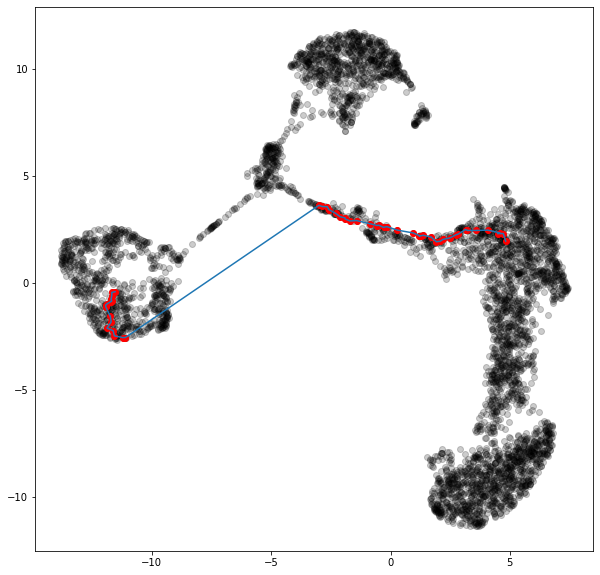

In [13]:

table = pd.read_table(umap_file, index_col=0)
mat = table.to_numpy()
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(mat[0], mat[1], color = 'k', alpha=0.2)

traj, time = sp.get_traj_and_time(dist_cos_file, "midpoint_AACACGTTCGGCGCTA-1", "tumor_GGGCATCAGTGTACCT-1")

k = check_coords.check_coords(traj, umap_coords)
print(k.to_string())

line = check_coords.get_line_map(traj, umap_coords)

ax.plot(line[0], line[1])
ax.scatter(line[0], line[1], color = 'r', alpha=1)

sp.write_changes(data_file_denoised, traj, time, dir + "/diffexp/892-to-45-cosine.tsv")

plt.show()

tumor_GGGCATCAGTGTACCT-1


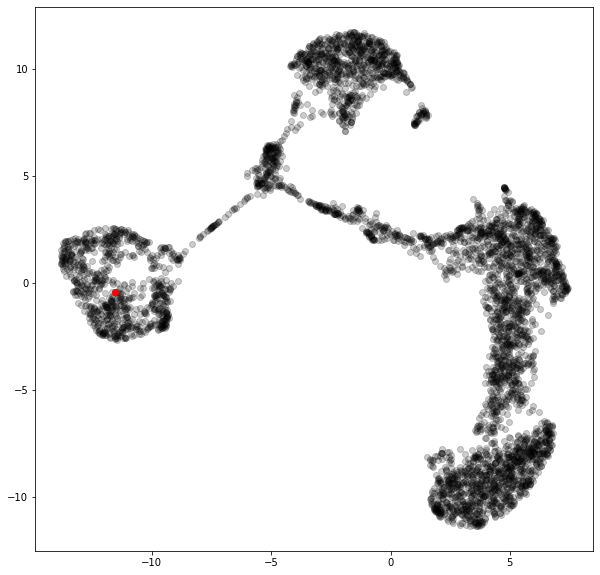

In [11]:
df = pd.read_table(metadata_file)
dic = df.set_index("cell_ID")["seurat_clusters"].to_dict()
subset = set([k for k,v in dic.items() if v == 4 or v == 5])

table = pd.read_table(umap_file, index_col=0)
mat = table.to_numpy()
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(mat[0], mat[1], color = 'k', alpha=0.2)

closest = sp.get_cell_closest_to_the_average_loc(pca_file, subset)
print(closest)
traj = [closest]

line = check_coords.get_line_map(traj, umap_coords)

ax.plot(line[0], line[1])
ax.scatter(line[0], line[1], color = 'r', alpha=1)

# sp.write_changes(data_file_denoised, traj, time, dir + "/diffexp/1-to-6-cosine.tsv")

plt.show()


In [36]:
subset = ["tumor_TCAGGTATCAATAAGG-1", "tumor_CTACCCAAGGAGTTTA-1"]
dataF = pd.read_table(pca_file, index_col=0)
mid = np.zeros(len(dataF))
for cell in subset:
    print(dataF[cell].to_numpy())
    mid += dataF[cell].to_numpy()
mid /= len(subset)

mid

[ 12.1696927    3.45703508  -2.59409743  -3.47857367 -12.86713696
  -9.25625368  -6.48957547  -5.73074966]
[ 27.88930997   5.70561084 -10.59224075  -2.70611593 -16.81007354
   6.99605739  -0.92998825  -9.30446182]


array([ 20.02950134,   4.58132296,  -6.59316909,  -3.0923448 ,
       -14.83860525,  -1.13009815,  -3.70978186,  -7.51760574])